# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}q={city}&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pariang
City not found. Skipping...
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | barabinsk
Processing Record 8 of Set 1 | flying fish cove
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | katsuura
Processing Record 11 of Set 1 | aykhal
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | prince rupert
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | sao mateus
Processing Record 20 of Set 1 | haiku-pauwela
Processing Record 21 of

Processing Record 38 of Set 4 | san antonio de pale
Processing Record 39 of Set 4 | chamical
Processing Record 40 of Set 4 | pointe michel
Processing Record 41 of Set 4 | remire-montjoly
Processing Record 42 of Set 4 | vuokatti
Processing Record 43 of Set 4 | mil'kovo
Processing Record 44 of Set 4 | lazaro cardenas
Processing Record 45 of Set 4 | ylitornio
Processing Record 46 of Set 4 | acarau
Processing Record 47 of Set 4 | salamanca
Processing Record 48 of Set 4 | cairns city
City not found. Skipping...
Processing Record 49 of Set 4 | espargos
City not found. Skipping...
Processing Record 0 of Set 5 | chodziez
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | baiao
Processing Record 3 of Set 5 | riosucio
Processing Record 4 of Set 5 | alghero
Processing Record 5 of Set 5 | hermanus
Processing Record 6 of Set 5 | alotau
City not found. Skipping...
Processing Record 7 of Set 5 | las lomas
Processing Record 8 of Set 5 | saudarkrokur
Processing Record 9 of Set 5 | north

City not found. Skipping...
Processing Record 31 of Set 8 | siwa oasis
Processing Record 32 of Set 8 | mitchell
Processing Record 33 of Set 8 | hood river
Processing Record 34 of Set 8 | lao cai
Processing Record 35 of Set 8 | luis correia
Processing Record 36 of Set 8 | rio san juan
Processing Record 37 of Set 8 | angaur state
Processing Record 38 of Set 8 | lepsy
Processing Record 39 of Set 8 | qamdo
Processing Record 40 of Set 8 | christchurch
Processing Record 41 of Set 8 | arthur's town
City not found. Skipping...
Processing Record 42 of Set 8 | port isabel
Processing Record 43 of Set 8 | al jawf
Processing Record 44 of Set 8 | klyuchi
Processing Record 45 of Set 8 | ga-kgapane
Processing Record 46 of Set 8 | sandnessjoen
Processing Record 47 of Set 8 | tinghir
Processing Record 48 of Set 8 | camana
Processing Record 49 of Set 8 | poronaysk
Processing Record 0 of Set 9 | cole harbour
Processing Record 1 of Set 9 | carnarvon
Processing Record 2 of Set 9 | castillos
Processing Recor

Processing Record 19 of Set 12 | borisoglebskiy
Processing Record 20 of Set 12 | alto araguaia
Processing Record 21 of Set 12 | kidal
Processing Record 22 of Set 12 | ignalina
Processing Record 23 of Set 12 | richards bay
Processing Record 24 of Set 12 | chui
Processing Record 25 of Set 12 | loreto
Processing Record 26 of Set 12 | malpica
Processing Record 27 of Set 12 | aksu
Processing Record 28 of Set 12 | likiep
Processing Record 29 of Set 12 | orvieto
Processing Record 30 of Set 12 | palo santo
Processing Record 31 of Set 12 | ust'-ilimsk
Processing Record 32 of Set 12 | waingapu
Processing Record 33 of Set 12 | ponot
Processing Record 34 of Set 12 | weno
Processing Record 35 of Set 12 | beaufort west
Processing Record 36 of Set 12 | san jose village
City not found. Skipping...
Processing Record 37 of Set 12 | kaa-khem
Processing Record 38 of Set 12 | sierra vista southeast
Processing Record 39 of Set 12 | stepnoye
Processing Record 40 of Set 12 | kibre mengist
Processing Record 41

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,289.55,52,84,7.24,AU,1703905062
1,iqaluit,63.7506,-68.5145,264.00,92,100,5.66,CA,1703904807
2,papatowai,-46.5619,169.4708,289.86,50,61,3.79,NZ,1703905062
3,adamstown,-25.0660,-130.1015,295.82,78,99,7.79,PN,1703905062
4,lihue,21.9789,-159.3672,296.13,73,17,3.49,US,1703905062


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,289.55,52,84,7.24,AU,1703905062
1,iqaluit,63.7506,-68.5145,264.00,92,100,5.66,CA,1703904807
2,papatowai,-46.5619,169.4708,289.86,50,61,3.79,NZ,1703905062
3,adamstown,-25.0660,-130.1015,295.82,78,99,7.79,PN,1703905062
4,lihue,21.9789,-159.3672,296.13,73,17,3.49,US,1703905062


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

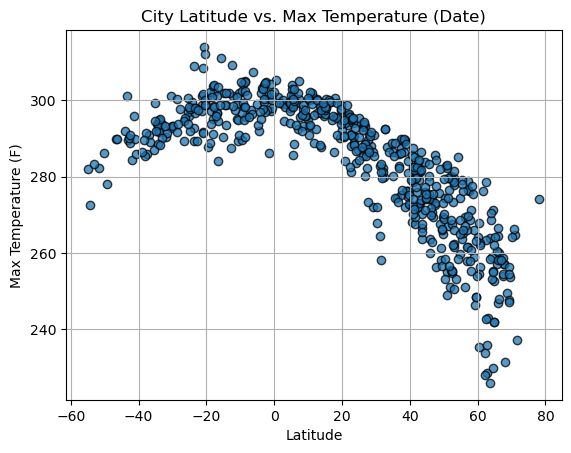

In [61]:
# Build scatter plot for latitude vs. temperature
plt.scatter(latitudes, temperatures, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

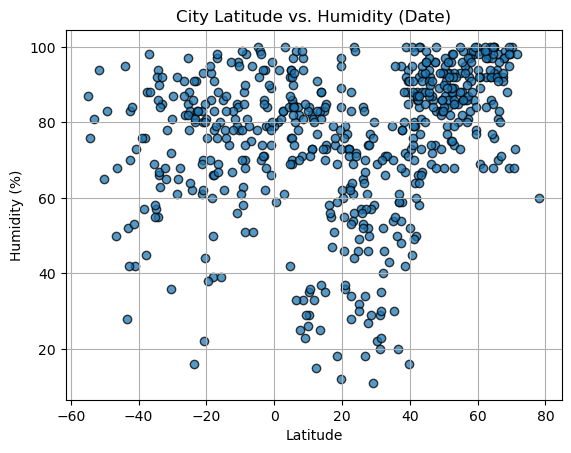

In [60]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(latitudes, humidities, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

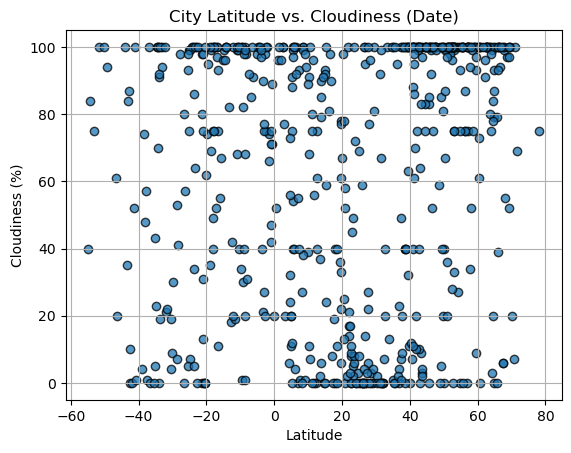

In [59]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(latitudes, cloudiness, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

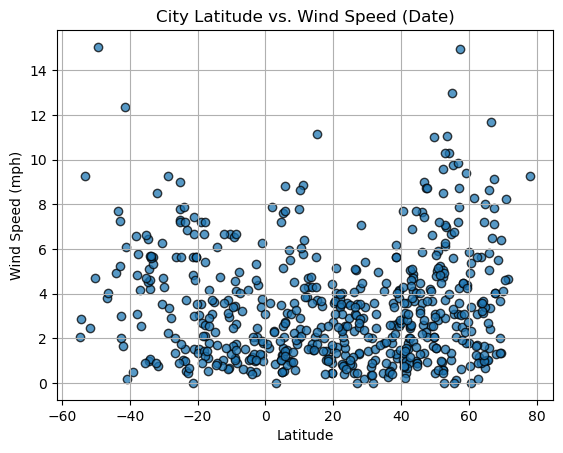

In [58]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(latitudes, wind_speeds, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Save the figure
plt.savefig("output_data/Fig4.png")
plt.grid(True)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(year, petrol_electric_cars)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


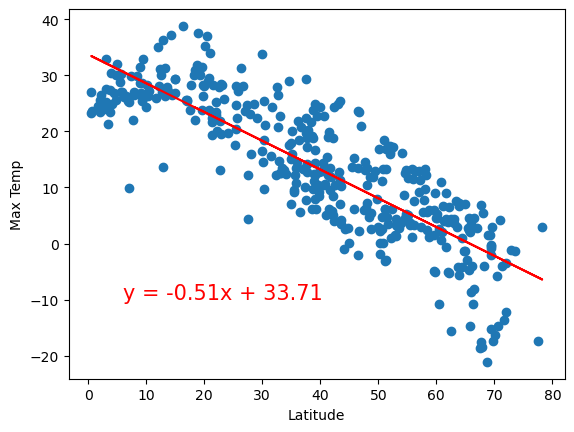

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


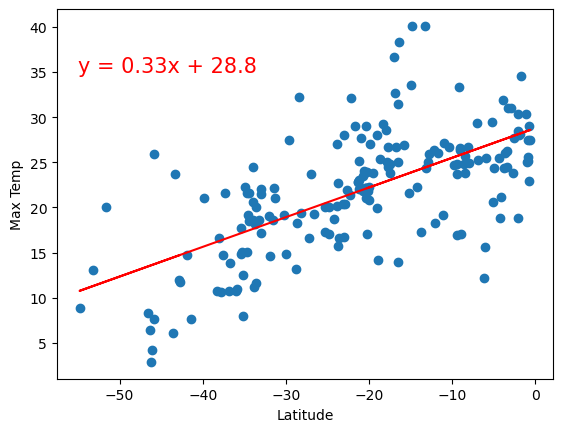

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


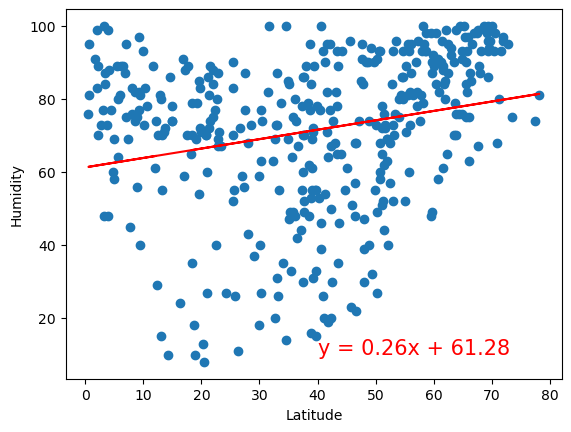

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


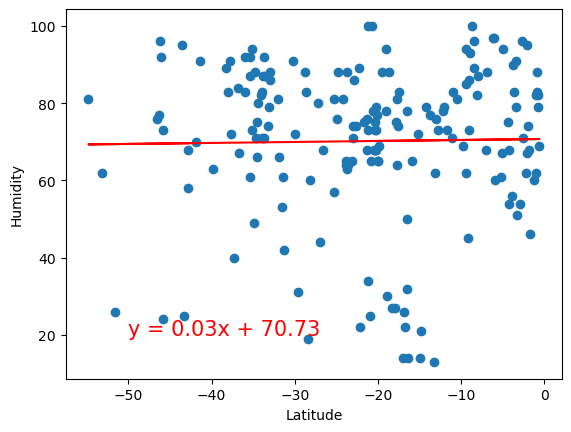

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


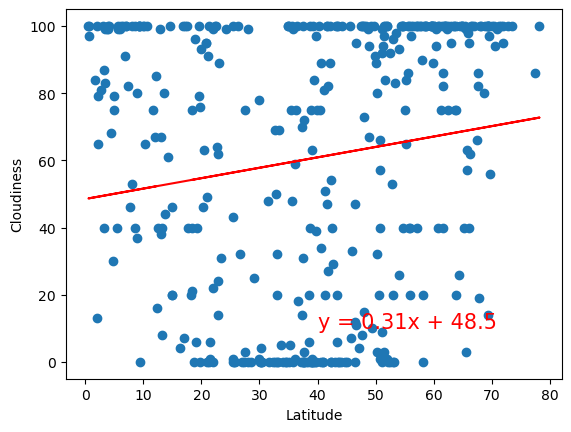

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


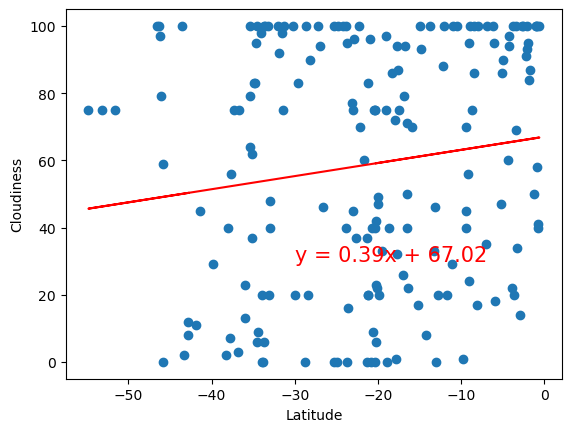

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


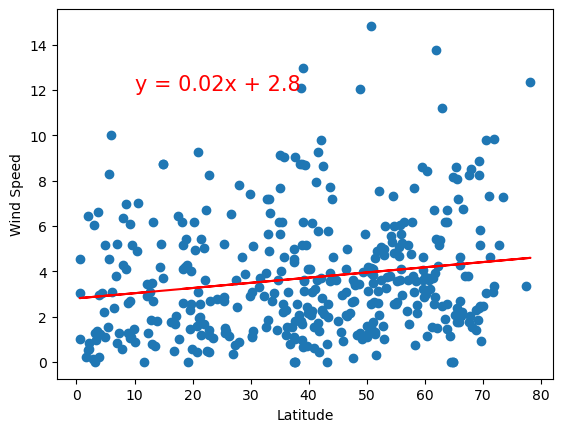

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


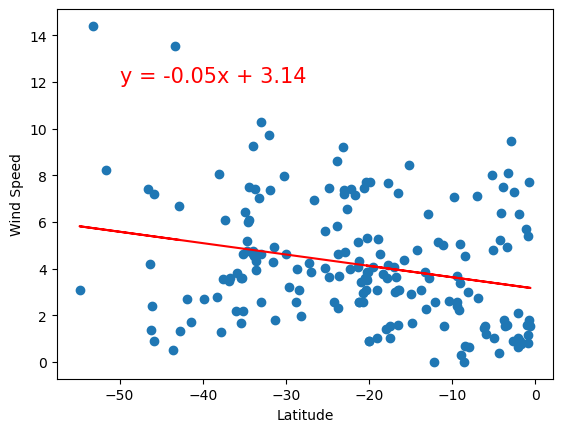

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE